In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')  # 更改绘图风格 R语言绘图库的风格
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']= False

In [3]:
# 导入用户表
users = pd.read_csv('users.csv')

# 导入充值行为表
recharge = pd.read_csv('recharge.csv')

# 导入消费行为表
consumption = pd.read_csv('consumption.csv')

In [4]:
#对users查漏补缺

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347535 entries, 0 to 347534
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   gouid         347535 non-null  int64 
 1   registertime  347535 non-null  int64 
 2   sex           347535 non-null  object
 3   utm_campaign  347535 non-null  object
dtypes: int64(2), object(2)
memory usage: 10.6+ MB


In [6]:
users.isnull().sum()

gouid           0
registertime    0
sex             0
utm_campaign    0
dtype: int64

In [7]:
#如果有广告来源为空的，默认为自然流量
##na_replacement={'utm_campaign':'自然流量'} 
##users=users.fillna(na_replacement)

In [8]:
#用户表新客画像

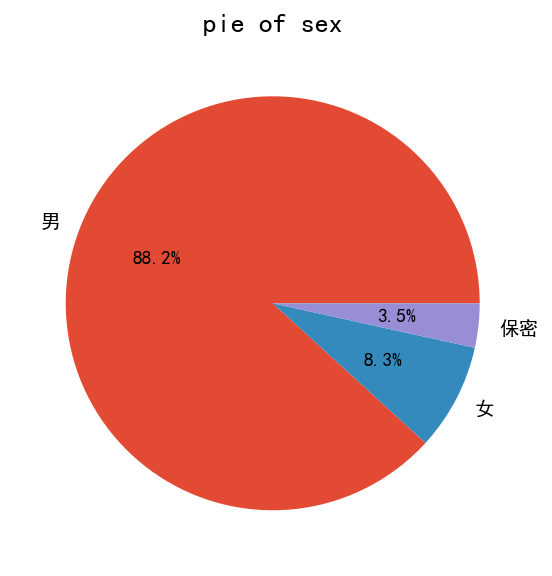

In [9]:
#新用户性别饼图
gender_counts = users['sex'].value_counts()
plt.figure(dpi=140)
gender_counts.plot(kind='pie',subplots=True,autopct='%1.1f%%',figsize=(10,10))
plt.title('pie of sex')
plt.ylabel('')
plt.show()

<AxesSubplot:>

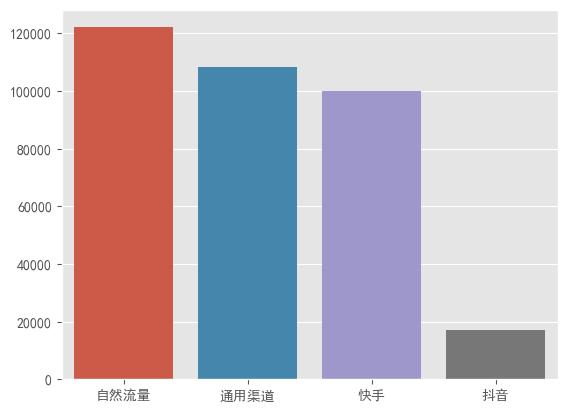

In [10]:
#新客广告来源占比
ad_counts = users['utm_campaign'].value_counts()
sns.barplot(x=ad_counts.index, y=ad_counts.values)

In [11]:
### 新客注册时间分布
import time
users.loc[:,'registertime']=users['registertime'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(x/1000)))

In [12]:
users.loc[:, 'month'] = users['registertime'].apply(lambda x: pd.to_datetime(x).month)

In [13]:
# 统计每个月的新客数量
monthly_users = users.groupby('month')['gouid'].count().reset_index()
monthly_users

,month,gouid
0,1,36059
1,2,28982
2,3,62166
3,4,64477
4,5,81477
5,6,74374


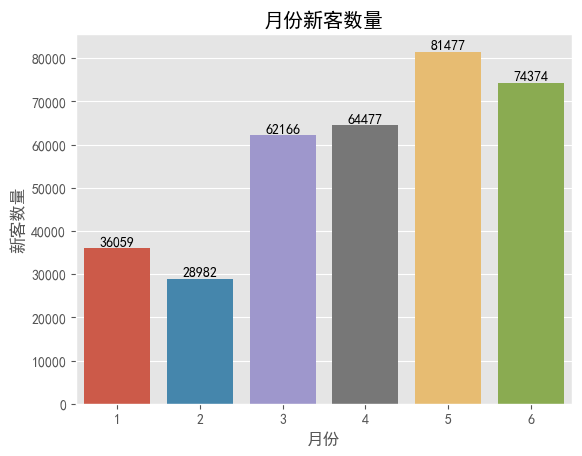

In [14]:
# 绘制月新客数量柱状图
sns.barplot(x='month', y='gouid', data=monthly_users)
plt.xlabel('月份')
plt.ylabel('新客数量')
plt.title('月份新客数量')
for index, row in monthly_users.iterrows():
    plt.text(index, row['gouid'], str(row['gouid']), ha='center', va='bottom')
plt.show()

In [15]:
#对recharge查漏补缺

In [16]:
recharge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   gouid   1000000 non-null  int64 
 1   amount  1000000 non-null  int64 
 2   time    1000000 non-null  object
 3   date    1000000 non-null  object
dtypes: int64(2), object(2)
memory usage: 30.5+ MB


In [17]:
recharge.isnull().sum()

gouid     0
amount    0
time      0
date      0
dtype: int64

In [18]:
# 增加对应月
recharge['date'] = pd.to_datetime(recharge['date'])
recharge['month'] = recharge['date'].dt.month

In [19]:
# 统计每个月的充值总金额
monthly_recharge_amount = recharge.groupby('month')['amount'].sum().reset_index()
monthly_recharge_amount

,month,amount
0,1,867941600
1,2,853539700
2,3,909401500
3,4,939355200
4,5,1152985100
5,6,1570519800


In [20]:
#每个月充值人数
monthly_recharge_count = recharge.groupby('month')['gouid'].nunique().reset_index()
monthly_recharge_count

,month,gouid
0,1,7782
1,2,7104
2,3,8077
3,4,7458
4,5,12175
5,6,12329


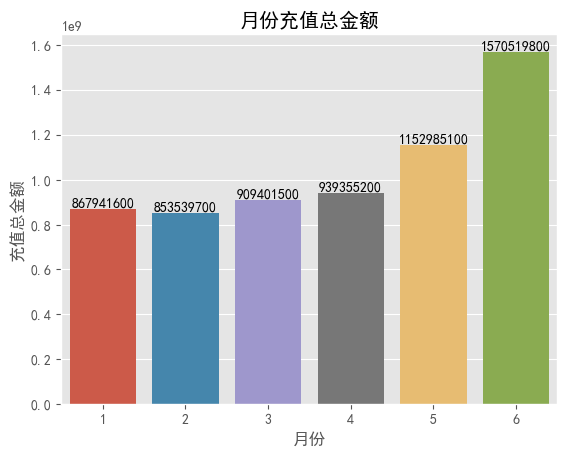

In [21]:
# 绘制月充值总金额折线图
sns.barplot(x='month', y='amount', data=monthly_recharge_amount)
plt.xlabel('月份')
plt.ylabel('充值总金额')
plt.title('月份充值总金额')
for index, row in monthly_recharge_amount.iterrows():
    plt.text(index, row['amount'], str(row['amount']), ha='center', va='bottom')
plt.show()

In [22]:
#与users表合并
recharge_users = pd.merge(recharge, users, on='gouid', how='left')  

In [23]:
recharge_users.loc[recharge_users['month_x'] == recharge_users['month_y'], 'user_type'] = '当月新客'
recharge_users.loc[recharge_users['month_x'] != recharge_users['month_y'], 'user_type'] = '非当月新客'
recharge_users.loc[recharge_users['month_y'].isnull(), 'user_type'] = '老客'


In [24]:
recharge_users['user_type'].value_counts()

老客       830674
当月新客     114763
非当月新客     54563
Name: user_type, dtype: int64

In [25]:
recharge_avg = recharge_users.groupby(['month_x','user_type']).agg({'amount': 'mean', 'gouid': 'count'}).reset_index()

In [26]:
recharge_avg

,month_x,user_type,amount,gouid
0,1,当月新客,10009.535604,14535
1,1,老客,13356.004585,54092
2,2,当月新客,8940.419860,15005
3,2,老客,13757.046640,43503
4,2,非当月新客,20059.041141,6028
5,3,当月新客,9635.555860,14608
6,3,老客,12515.721080,51097
7,3,非当月新客,13766.471215,9380
8,4,当月新客,12934.683504,12591
9,4,老客,6364.314688,99845


In [27]:
recharge_avg.columns = ['month_x', 'user_type', '充值平均值', '充值次数平均值']

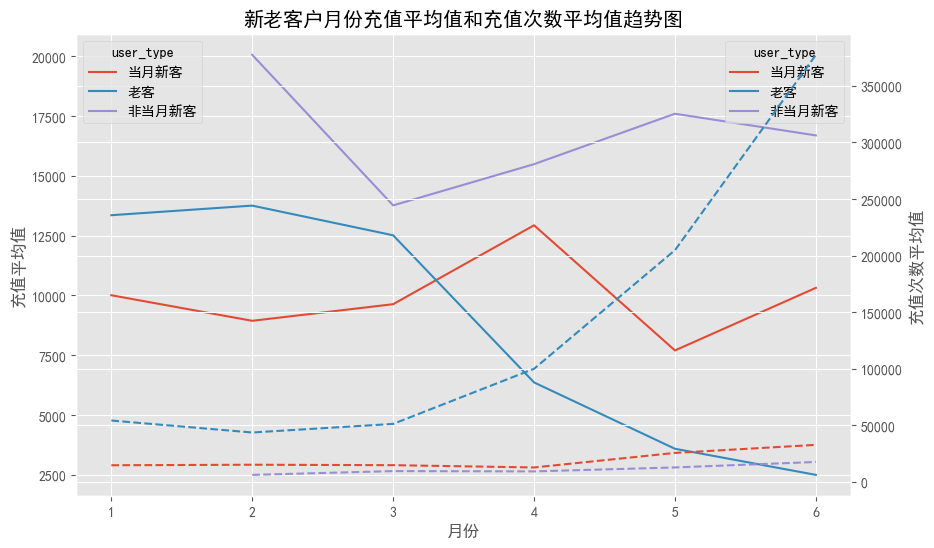

In [28]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
sns.lineplot(x='month_x', y='充值平均值', hue='user_type', data=recharge_avg, markers=True, ax=ax1)
sns.lineplot(x='month_x', y='充值次数平均值', hue='user_type', data=recharge_avg, linestyle='--', markers=True, ax=ax2)
ax1.set_ylabel('充值平均值')
ax2.set_ylabel('充值次数平均值')
ax1.set_xlabel('月份')
plt.title('新老客户月份充值平均值和充值次数平均值趋势图')
ax1.legend(title='user_type',loc='upper right')
ax2.legend(title='user_type',loc='upper left')
plt.show()

In [29]:
#对consumption查漏补缺

In [30]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   gouid       1000000 non-null  int64 
 1   giftamount  1000000 non-null  int64 
 2   v_roomtype  1000000 non-null  object
 3   time        1000000 non-null  object
 4   date        1000000 non-null  object
dtypes: int64(2), object(3)
memory usage: 38.1+ MB


In [31]:
consumption.isnull().sum()

gouid         0
giftamount    0
v_roomtype    0
time          0
date          0
dtype: int64

In [32]:
### 消费时间分布
consumption['date'] = pd.to_datetime(consumption['date'])
consumption['month'] = consumption['date'].dt.month

In [33]:
# 统计每个月的消费总金额
monthly_consumption_amount = consumption.groupby('month')['giftamount'].sum().reset_index()
monthly_consumption_amount

,month,giftamount
0,1,161093581
1,2,145475600
2,3,145001359
3,4,363626700
4,5,409934821
5,6,510981282


In [34]:
monthly_consumption_count = consumption.groupby('month')['gouid'].nunique().reset_index()
monthly_consumption_count

,month,gouid
0,1,4879
1,2,4329
2,3,4348
3,4,4765
4,5,6565
5,6,6877


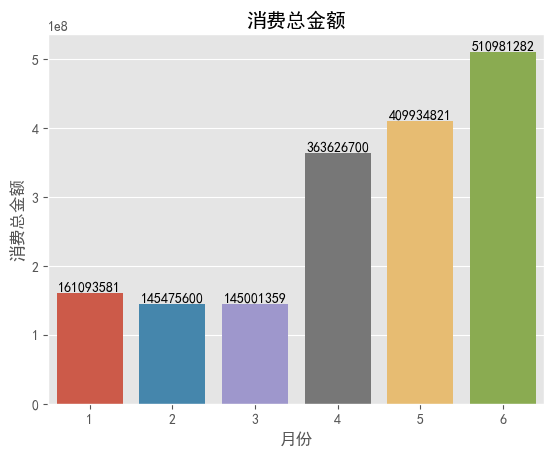

In [35]:
# 绘制月消费总金额柱状图
sns.barplot(x='month', y='giftamount', data=monthly_consumption_amount)
plt.xlabel('月份')
plt.ylabel('消费总金额')
plt.title('消费总金额')
for index, row in monthly_consumption_amount.iterrows():
    plt.text(index, row['giftamount'], str(row['giftamount']), ha='center', va='bottom')
plt.show()

In [36]:
# 与users表合并
consumption_users = pd.merge(consumption, users, on='gouid', how='left')  

In [37]:
consumption_users.loc[consumption_users['month_x'] == consumption_users['month_y'], 'user_type'] = '当月新客'
consumption_users.loc[consumption_users['month_x'] != consumption_users['month_y'], 'user_type'] = '非当月新客'
consumption_users.loc[consumption_users['month_y'].isnull(), 'user_type'] = '老客'

In [38]:
consumption_avg = consumption_users.groupby(['month_x','user_type']).agg({'giftamount': 'mean', 'gouid': 'count'}).reset_index()

In [39]:
consumption_avg.columns = ['month_x', 'user_type', '消费平均值', '消费次数平均值']

In [40]:
consumption_avg

,month_x,user_type,消费平均值,消费次数平均值
0,1,当月新客,1704.038323,26981
1,1,老客,1090.483806,105565
2,2,当月新客,2214.095316,21350
3,2,老客,1169.061299,68973
4,2,非当月新客,1637.100531,10733
5,3,当月新客,2261.340961,21152
6,3,老客,1225.056881,62886
7,3,非当月新客,1735.242479,11601
8,4,当月新客,1475.492281,30446
9,4,老客,3285.501651,86618


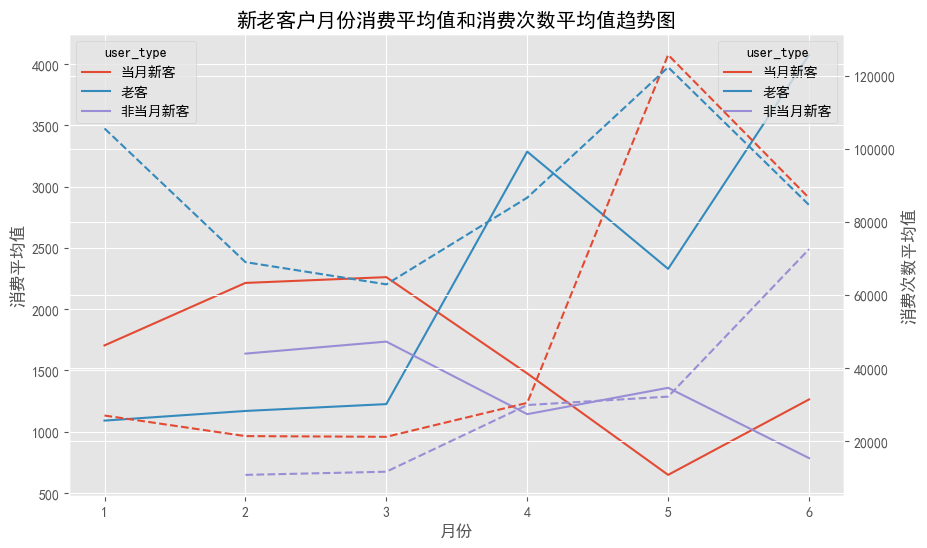

In [41]:
fig2, ax3 = plt.subplots(figsize=(10, 6))
ax4 = ax3.twinx()
sns.lineplot(x='month_x', y='消费平均值', hue='user_type', data=consumption_avg, markers=True, ax=ax3)
sns.lineplot(x='month_x', y='消费次数平均值', hue='user_type', data=consumption_avg, linestyle='--', markers=True, ax=ax4)
ax3.set_ylabel('消费平均值')
ax4.set_ylabel('消费次数平均值')
ax3.set_xlabel('月份')
plt.title('新老客户月份消费平均值和消费次数平均值趋势图')
ax3.legend(title='user_type',loc='upper right')
ax4.legend(title='user_type',loc='upper left')
plt.show()

In [56]:
#用户个体消费头名
consumption_perrank= consumption.groupby('gouid')['giftamount'].sum().sort_values(ascending=False).reset_index()
consumption_perrank.head()

,gouid,giftamount
0,202366,85494036
1,8888888,21224013
2,99999999,12139538
3,83421707,10349989
4,20217788,10120611


In [42]:
#针对有消费的用户，做一个RFM模型
consumption['订单数']='1'
consumption.head()

,gouid,giftamount,v_roomtype,time,date,month,订单数
0,83859323,9,个播,2023-03-22 20:03:28.034,2023-03-22,3,1
1,83859323,9,个播,2023-03-22 20:03:27.956,2023-03-22,3,1
2,83859323,9,个播,2023-03-22 20:03:27.776,2023-03-22,3,1
3,83859323,9,个播,2023-03-22 20:03:27.595,2023-03-22,3,1
4,83859323,9,个播,2023-03-22 20:03:27.467,2023-03-22,3,1


In [43]:
# 透视表的使用(index：相当于groupby分组，values：取出的数据列，aggfunc：key值必须存在于values中 且必须跟随有效的聚合函数)
rfm = consumption.pivot_table(index='gouid',
                    values=['date','订单数','giftamount'],
                    aggfunc={
                        'date':'max',  # 最后一次购买
                        '订单数':'count',  # 总订单数
                        'giftamount':'sum'   # 消费总金额
,                    })
rfm.head()

,date,giftamount,订单数
gouid,,,
100005,2023-05-09,722,17
202002,2023-06-28,73985,99
202199,2023-06-19,237536,104
202222,2023-06-26,207812,460
202303,2023-06-24,44928,87


In [44]:
#定义今天
today=pd.to_datetime('2023-07-01') 
rfm['R'] =(today-rfm['date']).dt.days   #取相差的天数
rfm.rename(columns={'订单数':'F','giftamount':'M'},inplace=True)
rfm.head()

,date,M,F,R
gouid,,,,
100005,2023-05-09,722,17,53
202002,2023-06-28,73985,99,3
202199,2023-06-19,237536,104,12
202222,2023-06-26,207812,460,5
202303,2023-06-24,44928,87,7


In [45]:
# RFM计算方式 ：每一列数据减去数据所在列的平均值（有正有负），根据结果值与1作比较，如果>=1，设置为1，否则为0
def rfm_func(x):  #x代表每一列数据
    level = x.apply(lambda x:'1' if x>=1 else '0')
    label = level['R'] + level['F'] + level['M']  
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
    }
    result = d[label]
    return result
rfm['label'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1) # axis=1 向右逐步取列
rfm.head()

,date,M,F,R,label
gouid,,,,,
100005,2023-05-09,722,17,53,一般挽留客户
202002,2023-06-28,73985,99,3,重要保持客户
202199,2023-06-19,237536,104,12,重要保持客户
202222,2023-06-26,207812,460,5,重要保持客户
202303,2023-06-24,44928,87,7,一般保持客户


Text(0, 0.5, 'M')

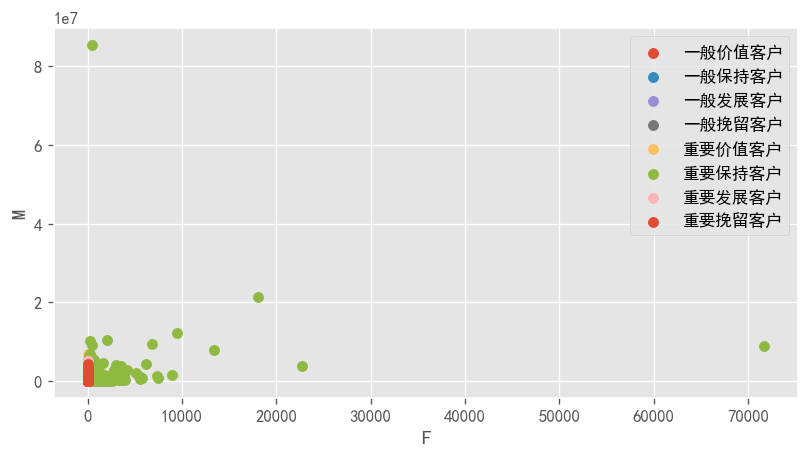

In [46]:
#用户分层可视化
plt.figure(figsize=(8,4),dpi=120)
for label,grouped in rfm.groupby(by='label'):
    x= grouped['F']
    y= grouped['M']
    plt.scatter(x,y,label=label)
plt.legend()
plt.xlabel('F')
plt.ylabel('M')

In [50]:
rfm.label.value_counts().reset_index().head()

,index,label
0,一般挽留客户,11116
1,一般发展客户,9640
2,重要保持客户,1109
3,一般保持客户,1051
4,重要挽留客户,597


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '一般挽留客户'),
  Text(1, 0, '一般发展客户'),
  Text(2, 0, '重要保持客户'),
  Text(3, 0, '一般保持客户'),
  Text(4, 0, '重要挽留客户'),
  Text(5, 0, '重要发展客户'),
  Text(6, 0, '一般价值客户'),
  Text(7, 0, '重要价值客户')])

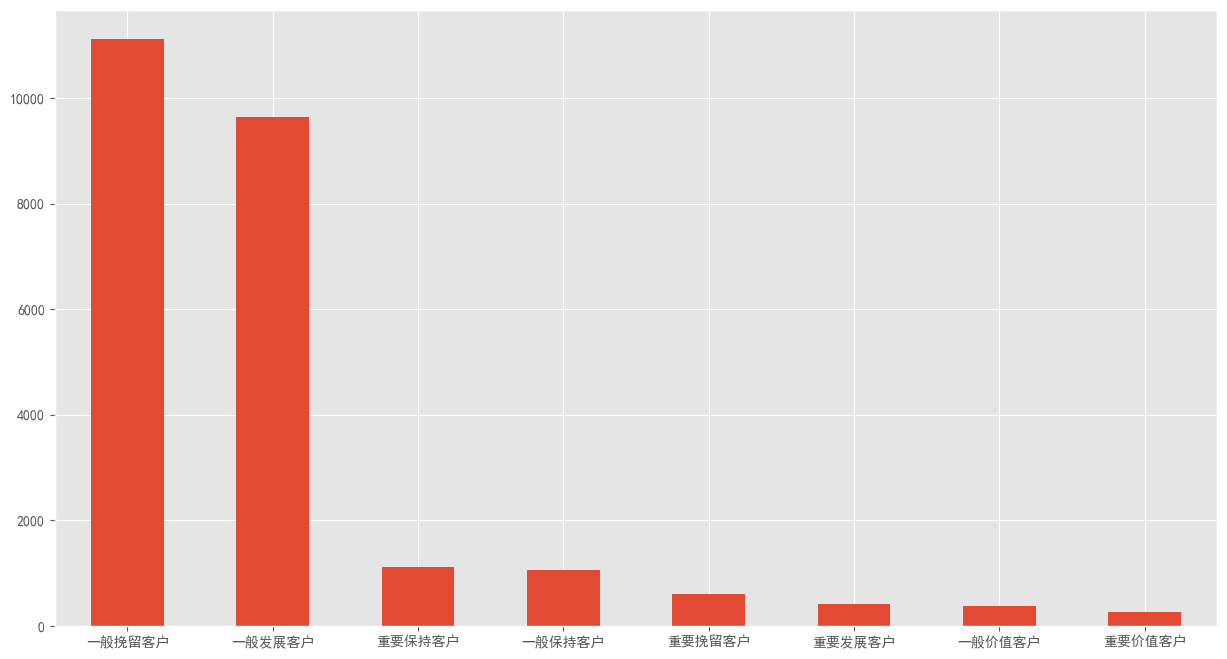

In [51]:
rfm.label.value_counts().plot.bar(figsize=(15,8))
plt.xticks(rotation=0)